In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist

import autokeras as ak

In [2]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(60000, 28, 28)
(60000,)
[9 0 0]


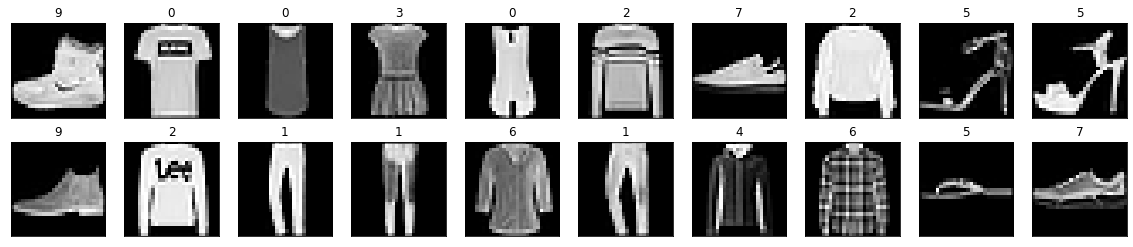

In [3]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the image classifier with training data.

In [5]:
clf.fit(x_train, y_train, epochs=1)

Trial 1 Complete [00h 00m 14s]
val_loss: 0.3178526759147644

Best val_loss So Far: 0.3178526759147644
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4238 - accuracy: 0.8493
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


In [6]:
# # CPU 학습
# print("CPU를 사용한 학습")
# with tf.device("/device:CPU:0"):
#   clf.fit(x_train, y_train, epochs=3)

In [7]:
# # GPU 학습
# print("GPU를 사용한 학습")
# with tf.device("/device:GPU:0"):
#   clf.fit(x_train, y_train, epochs=3)

In [6]:
# Export as a Keras Model
model = clf.export_model()
print(type(model.summary()))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

In [7]:
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y[:10])

313/313 [==============================] - 0s 884us/step
[['9']
 ['2']
 ['1']
 ['1']
 ['6']
 ['1']
 ['4']
 ['6']
 ['5']
 ['7']]


In [8]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8907
[0.31803590059280396, 0.8906999826431274]


In [9]:
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

In [10]:
from tensorflow.keras.utils import plot_model

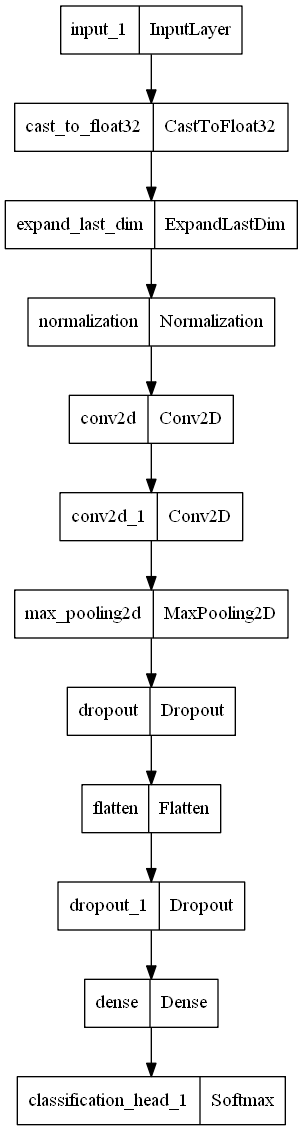

In [11]:
plot_model(model, "C:/workspace/autoencoder/03_ELECTRIC-ENGINE/my_first_model.png")

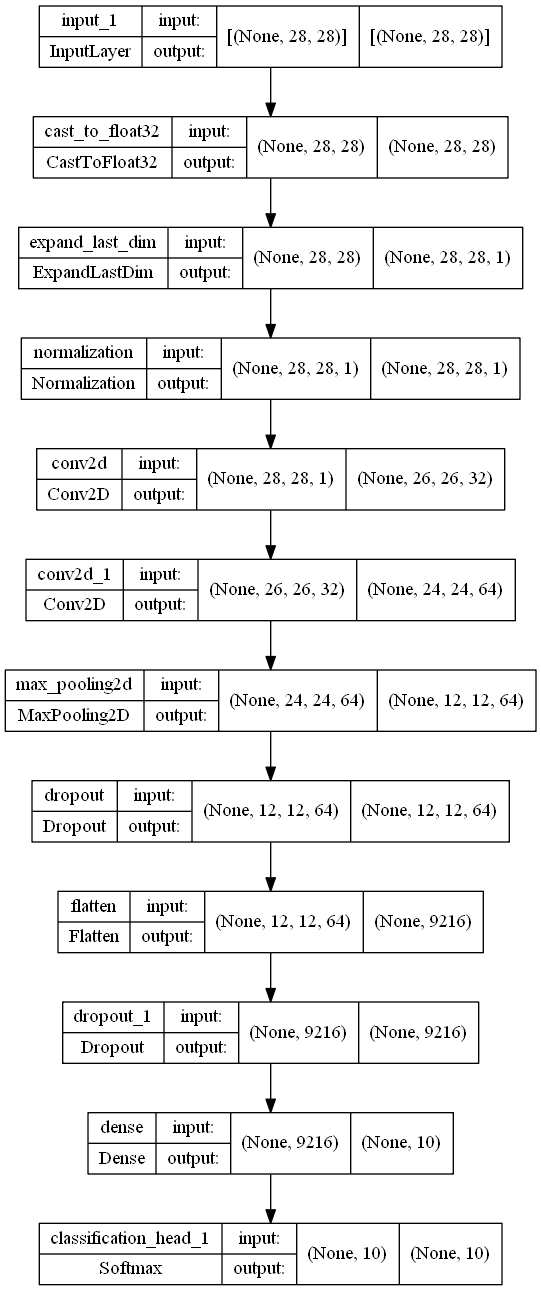

In [12]:
plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)